**Importing the dataset and reading the first 10 values:**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('HousePricePrediction.csv')
print(dataset.head(10))

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   
5   5          50       RL    14115    Inside     1Fam            5   
6   6          20       RL    10084    Inside     1Fam            5   
7   7          60       RL    10382    Corner     1Fam            6   
8   8          50       RM     6120    Inside     1Fam            5   
9   9         190       RL     7420    Corner   2fmCon            6   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0 

**Data Preprocessing:**

**Categorizing data based on their data type:**

In [3]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))


Categorical variables: 4
Integer variables: 6
Float variables: 3


**Heat Map for the dataset:**

<ipython-input-4-8feaf9d49085>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),


<Axes: >

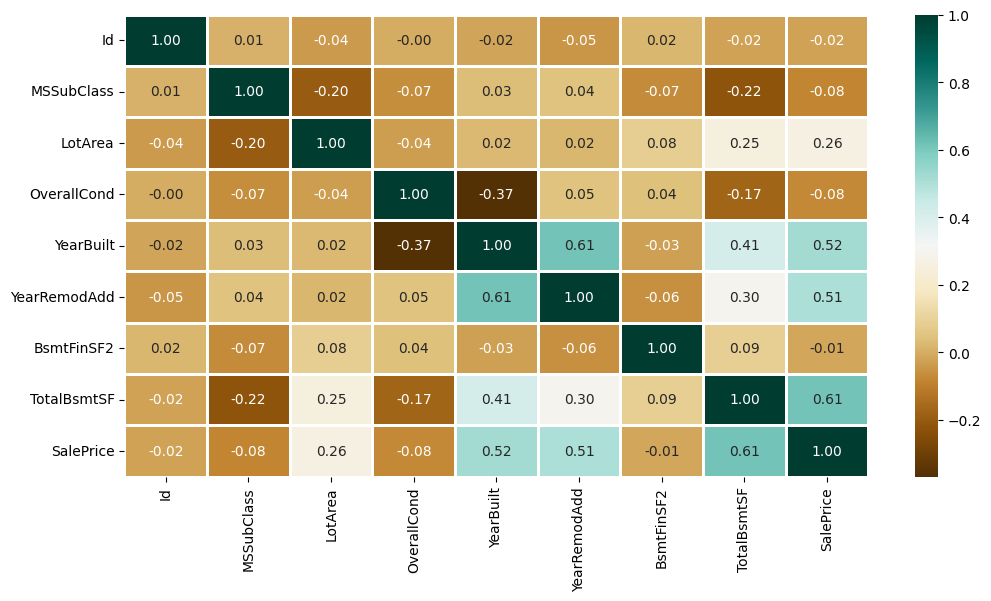

In [4]:
plt.figure(figsize=(12, 6))
sns.heatmap(dataset.corr(),
			cmap = 'BrBG',
			fmt = '.2f',
			linewidths = 2,
			annot = True)


**Analysing the categorical data using bar graph:**

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

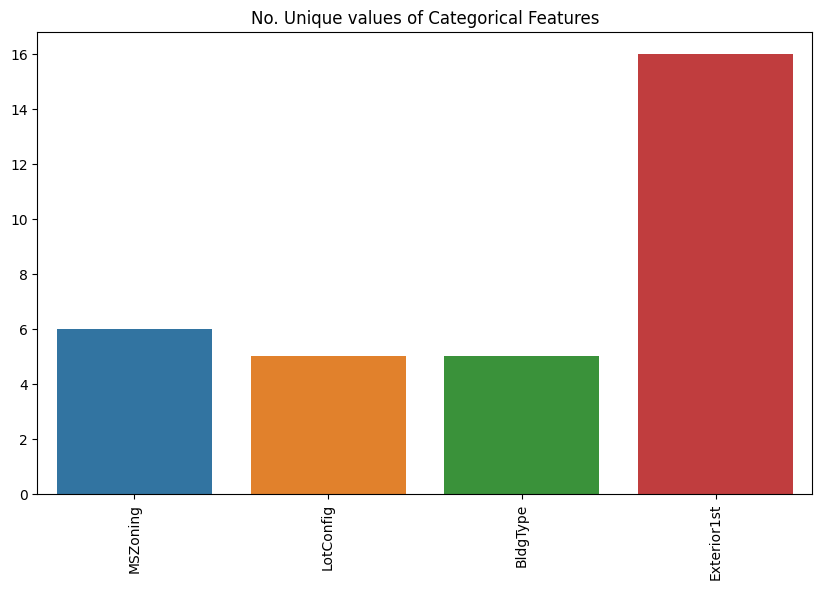

In [6]:
unique_values = []
for col in object_cols:
  unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)


**Actual count of each of the four category with bar graph:**

<ipython-input-7-648a2c778247>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(11, 4, index)


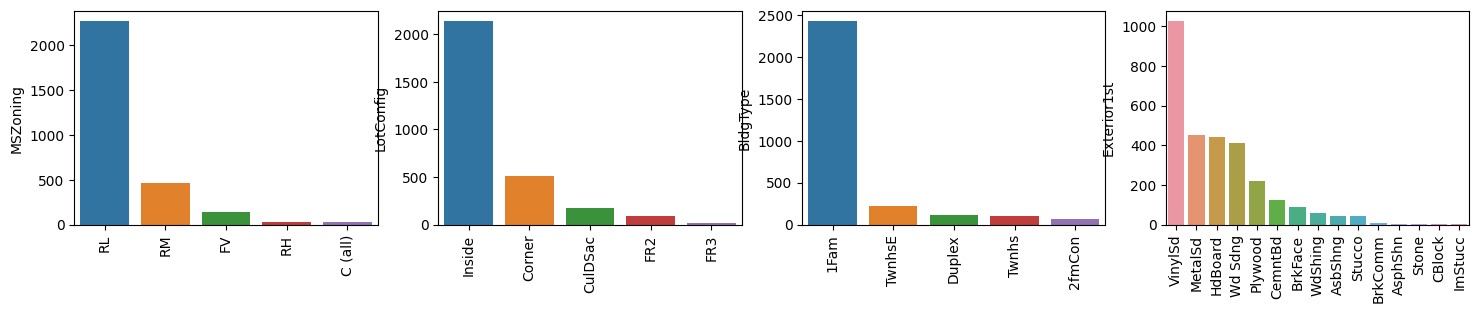

In [7]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
	y = dataset[col].value_counts()
	plt.subplot(11, 4, index)
	plt.xticks(rotation=90)
	sns.barplot(x=list(y.index), y=y)
	index += 1


**Data Cleaning:**

In [8]:
#As Id Column will not be participating in any prediction, dropping it
dataset.drop(['Id'],
			axis=1,
			inplace=True)

#Replacing SalePrice empty values with their mean values to make the data distribution symmetric.
dataset['SalePrice'] = dataset['SalePrice'].fillna(
dataset['SalePrice'].mean())

#Droping records with null values
new_dataset = dataset.dropna()

#Checking features which have null values in the new dataframe
new_dataset.isnull().sum()



MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

**Converting categorical data into binary vectors using OneHotEncoder:**

In [9]:
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
	len(object_cols))


Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


**Applying OneHotReload for the whole list of features:**

In [20]:
OH_encoder = OneHotEncoder(sparse_output=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)


**Splitting Dataset into Training and Testing:**

In [22]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

# Split the training set into
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
	X, Y, train_size=0.8, test_size=0.2, random_state=0)


**Training model with Linear Regression:**

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print("Mean absolute percentage error:",mean_absolute_percentage_error(Y_valid, Y_pred))

Mean absolute percentage error: 0.18741683841599854


**Visualization of linear Regression:**

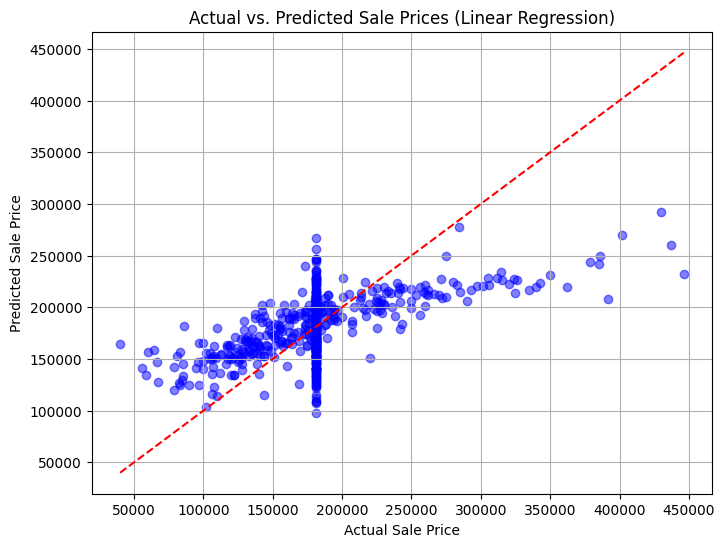

In [29]:
import matplotlib.pyplot as plt

# Creating a scatter plot for actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(Y_valid, Y_pred, color='blue', alpha=0.5)
plt.title('Actual vs. Predicted Sale Prices (Linear Regression)')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(Y_valid), max(Y_valid)], [min(Y_valid), max(Y_valid)], color='red', linestyle='--')

plt.show()
